<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [2]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\slee4\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Manifest.toml`


In [3]:
import SpecialFunctions
import Plots

In [4]:
using SpecialFunctions
function pdf_beta(α, β, x)
   f = (SpecialFunctions.gamma(α + β)/(SpecialFunctions.gamma(α) * SpecialFunctions.gamma(β))) .* 
        x.^(α .- 1) .* (1 .- x).^(β .- 1)
end

pdf_beta (generic function with 1 method)

### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

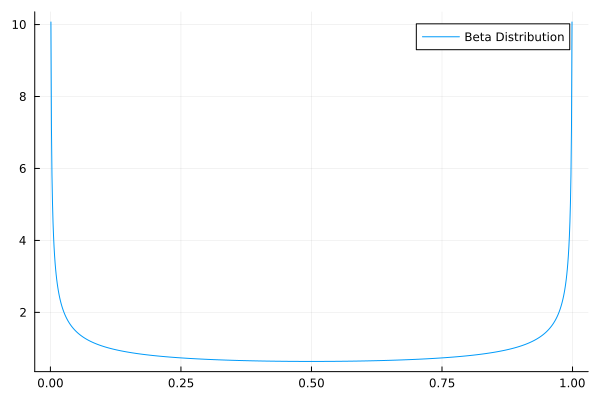

In [13]:
x = 0:0.001:1
α = 0.5
β = 0.5

using Plots
pdfBeta = pdf_beta(α, β, x)
plot(x, pdfBeta, label = "Beta Distribution")

The beta distribution has a U shape, dipping in the center and increasing very fast as you get farther from the center

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

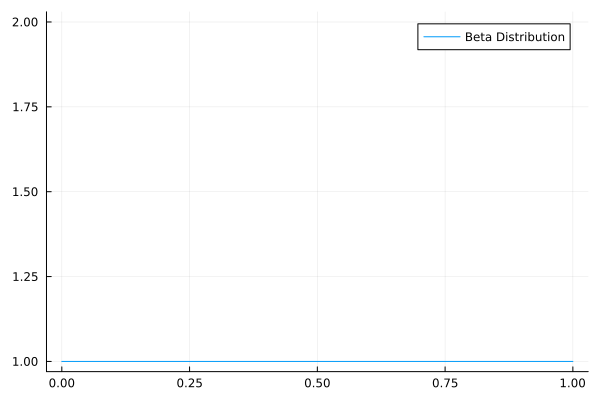

In [12]:
α = 1
β = 1

pdfBeta = pdf_beta(α, β, x)
plot(x, pdfBeta, label = "Beta Distribution")

This beta distribution has a very flat distribution, seeming to stay very close to 1

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

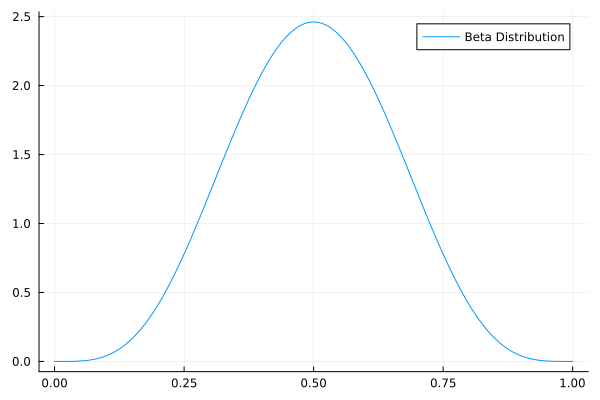

In [11]:
α = 5
β = 5

pdfBeta = pdf_beta(α, β, x)
plot(x, pdfBeta, label = "Beta Distribution")

This beta distribution has a shape that is very close to a bell-curve 

#### In our class on Tuesday, we went through how a Beta distribution is used as the conjugate prior of a binomial distribution that can be used in bayesian inference. 

If you forgot the derivation, [here is an example](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb). 

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 35 heads and 65 tails. 

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

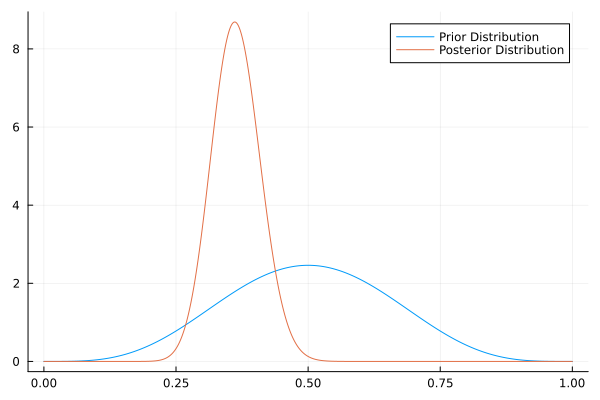

In [10]:
x = 0:0.001:1
α = 5
β = 5
prior = pdf_beta(α, β, x)

k = 35 #successes
n = 100 #total trials
α1 = α + k
β1 = n - k + β
posterior = pdf_beta(α1, β1, x)

plot(x, prior, label = "Prior Distribution")
plot!(x, posterior, label = "Posterior Distribution")


# Question 2
### (Conjugate Prior) Read the following example and complete the exercises 

#### In question 1, you see when a Beta distribution is used as the prior for a event that follows a binomial distribution (P(B|A)), the posterior distribution (P(A|B)) follows a Beta distribution. Using a conjugate prior simplify the posterior computation by keeping the posterior distribution identical to the prior distribution.


### 2.1 

Gaussian distribution is a conjugate prior of itself. Below is the probability density function of gaussian distribution. Given your likelihood P(Data|Hypothesis) follows N($\mu_1$, $\sigma_1$) and prior P(Hypothesis) follows N($\mu_2$, $\sigma_2$), derive the probability density function of the posterior distribution P(Hypothesis|Data) with updated $\mu$ and $\sigma$. Please show the `whole derivation process` to earn full credit.

\begin{equation*}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{equation*}

*You can ignore the marginal probability during the derivation.

\begin{equation*}
P(A|B) \propto P(B|A)P(A) 
\end{equation*}

### Hint 1
See [this page](https://jupyterbook.org/en/stable/content/math.html) for how to write equations in jupyter notebook

### Hint 2
The posterior probability is gaussian 

### Hint 3
$x^a*x^b = x^{(a+b)}$

Givens:

\begin{gather*}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} \\
P(Data|Hypothesis) \alpha N(\mu_1, \sigma_1)N(\mu_2, \sigma_2) \\
N(\mu_1, \sigma_1) = \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{(-\frac{(x-\mu_1)^2}{2\sigma_1^2})} = Likelihood \\
N(\mu_2, \sigma_2) = \frac{1}{\sqrt{2\pi\sigma_2^2}}e^{(-\frac{(x-\mu_2)^2}{2\sigma_2^2})} = Prior\\
\end{gather*}


Proof:

\begin{gather*}
P(Data|Hypothesis) \alpha {\frac{1}{\sqrt{2\pi\sigma_1^2}}}{\frac{1}{\sqrt{2\pi\sigma_2^2}}} e^{(-\frac{(x-\mu_1)^2}{2\sigma_1^2})+(-\frac{(x-\mu_2)^2}{2\sigma_2^2})} \\
P(Data|Hypothesis) \alpha {\frac{1}{2\pi\sigma_1\sigma_2}} e^{(-\frac{(x-\mu_1)^2}{2\sigma_1^2})-(\frac{(x-\mu_2)^2}{2\sigma_2^2})} \end{gather*}

\begin{gather*}
P(Data|Hypothesis) = N(\mu_{posterior}, \sigma_{posterior}) \\
P(Data|Hypothesis) = e^{\sum \frac{-1}{2} (\frac{(x-\mu_1)}{\sigma_1})^2} e^{\frac{-1}{2} (\frac{\mu_1-\mu_2}{\sigma_2})^2} \\
P(Data|Hypothesis) = e^{\frac{-1}{2\sigma_1^2} \sum (x^2 - 2x\mu_1 + \mu_1^2) + \frac{-1}{2\sigma_2^2}(\mu_1^2 2\mu_1\mu_2 + \mu_2^2)} \\
P(Data|Hypothesis) = e^{\frac{-\mu^2}{2} (\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}) + \mu(\frac{\mu_0}{\sigma_0^2} + \frac{\sum x_i}{\sigma^2}) - (\frac{\mu_0^2}{2\sigma_0^2} + \frac{\sum x_2^2}{2\sigma^2})}
\end{gather*}

Solving with updated $\sigma$:

\begin{gather*}
\frac{-\mu^2}{2\sigma_n^2} = \frac{-\mu^2}{2} (\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}) \\
\frac{1}{\sigma_n^2} = \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2} \\
\sigma_n^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
\end{gather*}



Solving with updated $\mu$:

\begin{gather*}
\frac{2\mu\mu_n}{2\sigma_n^2} = \mu(\frac{\mu_0}{\sigma_0^2} + \frac{\sum x_i}{\sigma^2}) \\
\frac{\mu_n}{\sigma_n^2} = \frac{\mu_0}{\sigma_0^2} + \frac{\sum x_i}{\sigma^2} \\
\mu_n = \sigma_n^2 ( \frac{\mu_0}{\sigma_0^2} + \frac{\sum x_i}{\sigma^2})
\end{gather*}


### 2.2 

Based on the results you got in 2.1, what normalization factor is needed for the posterior to satisfy $$\int_{-\infty}^{\infty}P(A|B) = 1$$

\begin{gather*}
P(Hypothesis|Data) = \frac{1}{\sqrt{2\pi}\sigma_{posterior}} e^{\frac{-1}{2} (\frac{x-\mu_{posterior}}{\sigma_{posterior}})^2} \\
P(A|B) = P(Hypothesis|Data) \\
\end{gather*}

\begin{gather*}
\int_{-\infty}^{\infty}P(Hypothesis|Data) dx =  \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma_{posterior}} e^{\frac{-1}{2} (\frac{x-\mu_{posterior}}{\sigma_{posterior}})^2} dx = 1 \\
normalization factor = \frac{1}{\sqrt{2\pi}\sigma_{posterior}}
\end{gather*}